In [1]:
import os
import torch

In [2]:
os.chdir('/nfs/students/summer-term-2020/project-3/src')

In [ ]:
!python code/YOLOv3/attack_and_detect.py --weights_path code/YOLOv3/checkpoints_best19/yolov3_ckpt_19.pth \
                                    --model_def code/YOLOv3/config/yolov3-custom.cfg \
                                    --class_path data2/classes.names \
                                    --img_size 608 \
                                    --conf_thres 0.8 \
                                    --attack_type PGD \
                                    --eps 1 \
                                    --adv_loss_type total \
                                    --alpha 2.0 \
                                    --iterations 20

Namespace(adv_loss_type='total', alpha=2.0, attack_type='PGD', checkpoint_model=None, class_path='data2/classes.names', conf_thres=0.8, eps=1.0, img_size=608, iterations=20, model_def='code/YOLOv3/config/yolov3-custom.cfg', n_cpu=0, nms_thres=0.5, samples_path='data2/custom_samples.txt', weights_path='code/YOLOv3/checkpoints_best19/yolov3_ckpt_19.pth')
Found device:  cuda

Performing object detection:
> /nfs/students/summer-term-2020/project-3/src/code/YOLOv3/attack_and_detect.py(137)<module>()
-> img = transforms.ToPILImage()(input_imgs.squeeze().detach().cpu()).convert("RGB")
(Pdb) 

In [ ]:
os.chdir('/nfs/students/summer-term-2020/project-3/src/YOLOv3/output/')

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

files = os.listdir()
images = [image for image in files if image.endswith('.png')]

for im_name in images:
    print(im_name)
    img = Image.open(im_name)
    plt.figure()
    fig, ax = plt.subplots(1)
    ax.imshow(np.asarray(img), aspect='auto')

In [ ]:
stats = [stat for stat in files if stat.endswith('.npy')]

In [ ]:
stats

In [ ]:
image_name = '9a4a4239-5de2e82e-cpkt_19'

# im_stats = []
# im_stats.extend([stat for stat in stats if stat.startswith(image_name) and stat.endswith('-total.npy') and 'PGD' in stat])
# im_stats = sorted(im_stats, key=lambda x: int("".join([i for i in x if i.isdigit()])))
# im_stats = sorted(im_stats)
# im_stats = [image_name + '.npy'] + im_stats
# im_stats = stats
# print(im_stats)

im_stats = ['9a4a4239-5de2e82e-cpkt_19.npy',
 '9a4a4239-5de2e82e-cpkt_19-PGD-0.01-1.0-total-10.npy',
 '9a4a4239-5de2e82e-cpkt_19-PGD-0.01-1.0-total-20.npy',
 '9a4a4239-5de2e82e-cpkt_19-PGD-0.01-1.0-total-30.npy',
 '9a4a4239-5de2e82e-cpkt_19-PGD-0.01-1.0-total-40.npy',
 '9a4a4239-5de2e82e-cpkt_19-PGD-0.01-1.0-total-50.npy']

metrics = []
for im_stat in im_stats:
    metric = np.load(im_stat)
    metrics.append(metric)
metrics = np.array(metrics)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
xaxis_range = ('FGSM $\epsilon$ = 2', 'FGSM $\epsilon$ = 8')
title = 'Normal vs. Adversarial Training after 13 epochs'
X = np.arange(2)

In [ ]:
# plt.figure()
# plt.bar(xaxis_range, [10, 10, 0], width=0.5)
# plt.ylabel('Avg. True Positives per image')
# plt.title(title)
# plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X + 0.0, [10, 7], width=0.2)
ax.bar(X + 0.2, [10, 8], width=0.2)
ax.set_xticks(X)
ax.set_xticklabels(xaxis_range)
ax.legend(labels=['Normal Training', 'Adversarial Training'])
plt.ylabel('Avg. True Positives per image')
plt.title(title)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X + 0.0, [29, 35], width=0.2)
ax.bar(X + 0.2, [7, 11], width=0.2)
ax.set_xticks(X)
ax.set_xticklabels(xaxis_range)
ax.legend(labels=['Normal Training', 'Adversarial Training'])
plt.ylabel('Avg. False Positives per image')
plt.title(title)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X + 0.0, [0.52, 0.47], width=0.2)
ax.bar(X + 0.2, [0.42, 0.36], width=0.2)
ax.set_xticks(X)
ax.set_xticklabels(xaxis_range)
ax.legend(labels=['Normal Training', 'Adversarial Training'])
plt.ylabel('Avg. Misclassifications per image')
plt.title(title)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X + 0.0, [0.71, 0.69], width=0.2)
ax.bar(X + 0.2, [0.74, 0.72], width=0.2)
ax.set_xticks(X)
ax.set_xticklabels(xaxis_range)
ax.legend(labels=['Normal Training', 'Adversarial Training'])
plt.ylabel('Avg. IoU of True Positives')
plt.title(title)
plt.show()

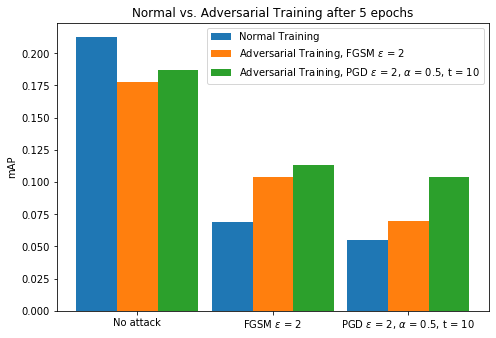

In [9]:
xaxis_range = ('No attack', 'FGSM $\epsilon$ = 2', r'PGD $\epsilon$ = 2, $\alpha$ = 0.5, t = 10')
title = 'Normal vs. Adversarial Training after 5 epochs'
X = np.arange(3)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X + 0.0, [0.213, 0.069, 0.055], width=0.3)  # normal training 
ax.bar(X + 0.3, [0.178, 0.104, 0.070], width=0.3)  # adv 1
ax.bar(X + 0.6, [0.187, 0.1135, 0.104], width=0.3)  # adv 2
ax.set_xticks(X + 0.3)
ax.set_xticklabels(xaxis_range)
ax.legend(labels=['Normal Training', 'Adversarial Training, FGSM $\epsilon$ = 2', r'Adversarial Training, PGD $\epsilon$ = 2, $\alpha$ = 0.5, t = 10'])
plt.ylabel('mAP')
plt.title(title)
plt.show()

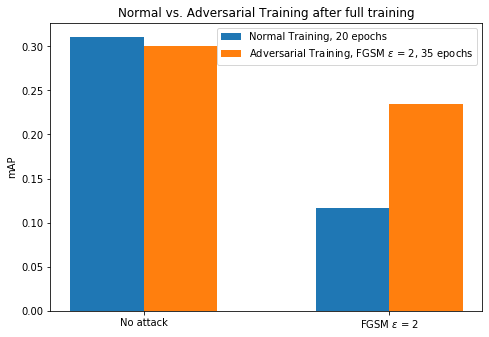

In [13]:
xaxis_range = ('No attack', 'FGSM $\epsilon$ = 2')
title = 'Normal vs. Adversarial Training after full training'
X = np.arange(2)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X + 0.0, [0.311, 0.117], width=0.3)  # normal training 
ax.bar(X + 0.3, [0.300, 0.234], width=0.3)  # adv 1
ax.set_xticks(X + 0.15)
ax.set_xticklabels(xaxis_range)
ax.legend(labels=['Normal Training, 20 epochs', 'Adversarial Training, FGSM $\epsilon$ = 2, 35 epochs'])
plt.ylabel('mAP')
plt.title(title)
plt.show()

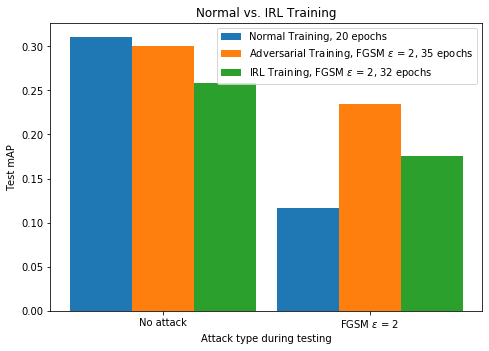

In [8]:
xaxis_range = ('No attack', 'FGSM $\epsilon$ = 2')
title = 'Normal vs. IRL Training'
X = np.arange(2)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X + 0.0, [0.311, 0.117], width=0.3)  # normal training 
ax.bar(X + 0.3, [0.300, 0.234], width=0.3)
ax.bar(X + 0.6, [0.258, 0.175], width=0.3)  # adv 
ax.set_xticks(X + 0.3)
ax.set_xticklabels(xaxis_range)
ax.legend(labels=['Normal Training, 20 epochs', 'Adversarial Training, FGSM $\epsilon$ = 2, 35 epochs','IRL Training, FGSM $\epsilon$ = 2, 32 epochs'])
plt.ylabel('Test mAP')
plt.xlabel('Attack type during testing')
plt.title(title)
plt.show()

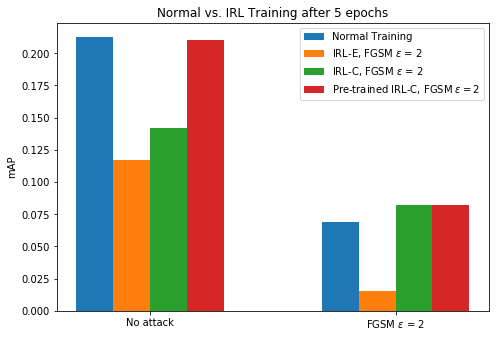

In [20]:
xaxis_range = ('No attack', 'FGSM $\epsilon$ = 2')
title = 'Normal vs. IRL Training after 5 epochs'
X = np.arange(2)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X + 0.0, [0.213, 0.069], width=0.15)  # normal training 
ax.bar(X + 0.15, [0.117, 0.015], width=0.15)  # irl 1
ax.bar(X + 0.30, [0.142, 0.082], width=0.15)  # irl 2
ax.bar(X + 0.45, [0.210, 0.082], width=0.15)  # irl 3
ax.set_xticks(X + 0.225)
ax.set_xticklabels(xaxis_range)
ax.legend(labels=['Normal Training', 'IRL-E, FGSM $\epsilon$ = 2', r'IRL-C, FGSM $\epsilon$ = 2', 'Pre-trained IRL-C, FGSM $\epsilon = 2$'])
plt.ylabel('mAP')
plt.title(title)
plt.show()

In [17]:
np.arange(2)

array([0, 1])

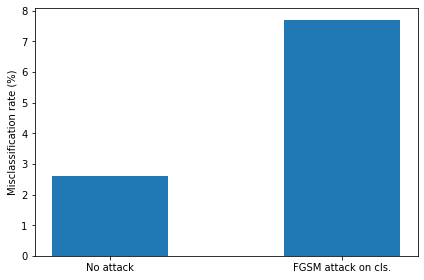

In [21]:
xaxis_range = ('No attack', 'FGSM attack on cls.')
X = [0, 0.2]
plt.figure()
plt.bar(X, [2.6, 7.7], width=0.1, align='center')
plt.ylabel('Misclassification rate (%)')
plt.tight_layout()
plt.xticks(X, labels=xaxis_range)
plt.show()

In [ ]:
# plt.figure()
# plt.bar(xaxis_range, metrics[:, 2].astype(int), width=0.5)
# plt.ylabel('False Negatives')
# plt.title(title)
# plt.show()

In [ ]:
# plt.figure()
# plt.bar(xaxis_range, [0.56, 0.42, 0], width=0.5)
# plt.ylabel('Avg. Misclassifications per image')
# plt.title(title)
# plt.show()

In [ ]:
# plt.figure()
# plt.bar(xaxis_range, [0.71, 0.74, 0], width=0.5)
# plt.ylabel('Avg. IoU of True Positives')
# plt.title(title)
# plt.show()

In [ ]:
# plt.figure()
# plt.bar(xaxis_range, metrics[:, 5], width=0.5)
# plt.ylabel('Confidence on False Positives')
# plt.title(title)
# plt.show()

In [ ]:
# plt.figure()
# plt.bar(xaxis_range, [0.088, 0.198, 0], width=0.5)
# plt.ylabel('mAP')
# plt.title(title)
# plt.show()

In [44]:
!python code/shared/plots/plot_layerdist.py

save to: results/dist-layer-distanceofactivationsbetweencleanandnoisydataonRetinaNet.png


In [27]:
!python code/shared/plots/mAP_per_epoch.py